In [41]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

In [42]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

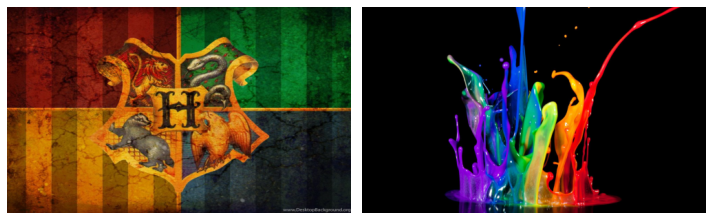

In [43]:
img = cv.imread("hogwarts.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_2 = cv.imread("color.jpg")
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

dim = (500, 300)
# resize image
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)

show_img_compar(img, img_2)

In [44]:
from sklearn.cluster import KMeans

In [45]:
clt = KMeans(n_clusters=5)
clt.fit(img.reshape(-1, 3))

clt.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
clt.cluster_centers_

array([[ 23.76327246,  32.06917605,  26.29467509],
       [207.85357052, 126.16545766,  20.64440637],
       [136.69015169,  73.95553246,  19.06776007],
       [ 92.47628938,  24.15572068,  10.80092444],
       [ 14.44336648,  88.73918668,  33.35706201]])

In [47]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

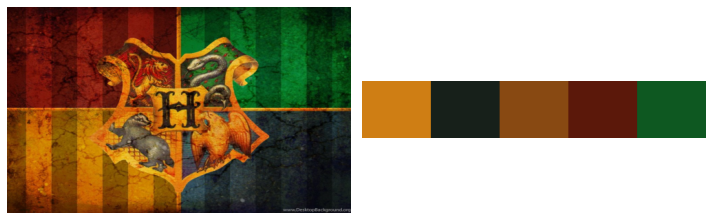

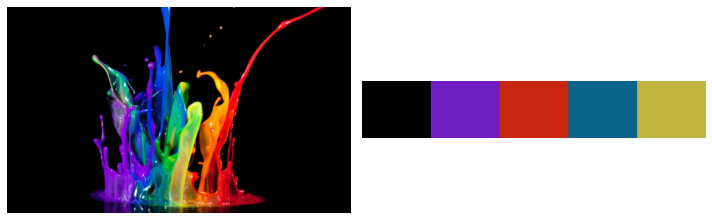

In [38]:
clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette(clt_1))

clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette(clt_2))

<function matplotlib.pyplot.show(close=None, block=None)>

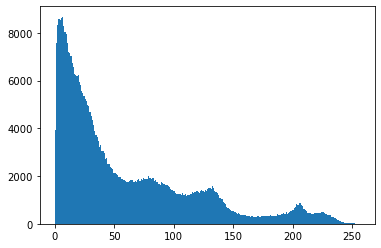

In [48]:
plt.hist(img.ravel(), 256, [0, 256])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

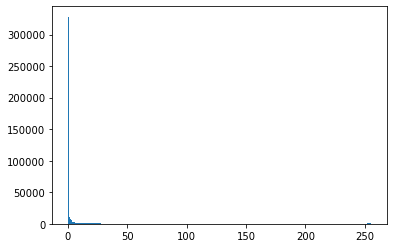

In [49]:
plt.hist(img_2.ravel(), 256, [0, 256])
plt.show